In [1]:
import sys
import sympy as sp

from IPython.display import display, Markdown

## Symbolic Calculations

In [2]:
x, y, theta = sp.symbols(r'x, y, \theta')
xd, yd, thetad = sp.symbols(r'x_d, y_d, \theta_d')
u1, u2 = sp.symbols(r'u_1, u_2')
Q1, Q2, Q3 = sp.symbols(r'Q_1, Q_2, Q_3')
R1, R2 = sp.symbols(r'R_1, R_2')
P11, P12, P13 = sp.symbols(r'P_{11}, P_{12}, P_{13}')

In [3]:
xdot = sp.Matrix([sp.cos(theta)*u1, sp.sin(theta)*u1, u2])
left = r'\dot{\vec{x}}='
display(Markdown(f'${left}{sp.latex(xdot)}$'))
# print(sp.latex(xdot))

$\dot{\vec{x}}=\left[\begin{matrix}u_{1} \cos{\left(\theta \right)}\\u_{1} \sin{\left(\theta \right)}\\u_{2}\end{matrix}\right]$

In [4]:
x_vec = sp.Matrix([x, y, theta])
xd_vec = sp.Matrix([xd, yd, thetad])
u_vec = sp.Matrix([u1, u2])

x_left = r'\vec{x}='
u_left = r'\vec{u}='
display(Markdown(f'${x_left}{sp.latex(x_vec)}$'))
display(Markdown(f'${u_left}{sp.latex(u_vec)}$'))

$\vec{x}=\left[\begin{matrix}x\\y\\\theta\end{matrix}\right]$

$\vec{u}=\left[\begin{matrix}u_{1}\\u_{2}\end{matrix}\right]$

In [5]:
A_mat = xdot.jacobian(x_vec)
B_mat = xdot.jacobian(u_vec)

A_left = r'A='
B_left = r'B='

display(Markdown(f'${A_left}{sp.latex(A_mat)}$'))
display(Markdown(f'${B_left}{sp.latex(B_mat)}$'))

$A=\left[\begin{matrix}0 & 0 & - u_{1} \sin{\left(\theta \right)}\\0 & 0 & u_{1} \cos{\left(\theta \right)}\\0 & 0 & 0\end{matrix}\right]$

$B=\left[\begin{matrix}\cos{\left(\theta \right)} & 0\\\sin{\left(\theta \right)} & 0\\0 & 1\end{matrix}\right]$

In [6]:
Qx = sp.diag(Q1, Q2, Q3)
Ru = sp.diag(R1, R2)
P1 = sp.diag(P11, P12, P13)

qx_left = r'Q_x='
ru_left = r'R_u='
p1_left = r'P_1='

display(Markdown(f'${qx_left}{sp.latex(Qx)}$'))
display(Markdown(f'${ru_left}{sp.latex(Ru)}$'))
display(Markdown(f'${p1_left}{sp.latex(P1)}$'))

$Q_x=\left[\begin{matrix}Q_{1} & 0 & 0\\0 & Q_{2} & 0\\0 & 0 & Q_{3}\end{matrix}\right]$

$R_u=\left[\begin{matrix}R_{1} & 0\\0 & R_{2}\end{matrix}\right]$

$P_1=\left[\begin{matrix}P_{11} & 0 & 0\\0 & P_{12} & 0\\0 & 0 & P_{13}\end{matrix}\right]$

In [7]:
l = (x_vec - xd_vec).T @ Qx @ (x_vec - xd_vec) + u_vec.T @ Ru @ u_vec

left_l = r'l(x, u)='
display(Markdown(f'${left_l}{sp.latex(l[0])}$'))

$l(x, u)=Q_{1} \left(x - x_{d}\right)^{2} + Q_{2} \left(y - y_{d}\right)^{2} + Q_{3} \left(\theta - \theta_{d}\right)^{2} + R_{1} u_{1}^{2} + R_{2} u_{2}^{2}$

In [8]:
dldx = l.jacobian(x_vec).T
dldu = l.jacobian(u_vec).T

dldx_left = r"\frac{\partial l}{\partial \vec{x}}="
dldu_left = r"\frac{\partial l}{\partial \vec{u}}="

display(Markdown(f"${dldx_left}{sp.latex(dldx)}$"))
display(Markdown(f"${dldu_left}{sp.latex(dldu)}$"))

$\frac{\partial l}{\partial \vec{x}}=\left[\begin{matrix}Q_{1} \cdot \left(2 x - 2 x_{d}\right)\\Q_{2} \cdot \left(2 y - 2 y_{d}\right)\\Q_{3} \cdot \left(2 \theta - 2 \theta_{d}\right)\end{matrix}\right]$

$\frac{\partial l}{\partial \vec{u}}=\left[\begin{matrix}2 R_{1} u_{1}\\2 R_{2} u_{2}\end{matrix}\right]$

In [9]:
mxT = (x_vec - xd_vec).T @ P1 @ (x_vec - xd_vec)
dmdxT = mxT.jacobian(x_vec).T

left_mxT = r"m(\vec{x}(T))="
left_dmdxT = r'\frac{\partial m}{\partial \vec{x}(T)}='

display(Markdown(f'${left_mxT}{sp.latex(mxT)}$'))
display(Markdown(f'${left_dmdxT}{sp.latex(dmdxT)}$'))

$m(\vec{x}(T))=\left[\begin{matrix}P_{11} \left(x - x_{d}\right)^{2} + P_{12} \left(y - y_{d}\right)^{2} + P_{13} \left(\theta - \theta_{d}\right)^{2}\end{matrix}\right]$

$\frac{\partial m}{\partial \vec{x}(T)}=\left[\begin{matrix}P_{11} \cdot \left(2 x - 2 x_{d}\right)\\P_{12} \cdot \left(2 y - 2 y_{d}\right)\\P_{13} \cdot \left(2 \theta - 2 \theta_{d}\right)\end{matrix}\right]$

## Numeric Calculations

In [10]:
# Clean environment
sys.modules[__name__].__dict__.clear()

import copy

import numpy as np
import scipy.integrate as sint
import scipy.interpolate as sitr

import matplotlib.pyplot as plt

In [11]:
### define parameters

dt = 0.1
T = 2.0*np.pi
x0 = np.array([0.0, 0.0, np.pi/2.0])
tlist = np.arange(0, T, dt)
tsteps = tlist.shape[0]
init_u_traj = np.tile(np.array([1.0, -0.5]), reps=(tsteps,1))

Q_x = np.diag([10.0, 10.0, 2.0])
R_u = np.diag([4.0, 2.0])
P1 = np.diag([20.0, 20.0, 5.0])

Q_z = np.diag([5.0, 5.0, 1.0])
R_v = np.diag([2.0, 1.0])

In [12]:
def dyn(xt, ut):
    # xdot = np.zeros(3)  # replace this
    theta = xt[2]
    u1 = ut[0]
    u2 = ut[1]
    x1dot = np.cos(theta) * u1
    x2dot = np.sin(theta) * u1
    x3dot = u2

    xdot = np.array([x1dot, x2dot, x3dot])
    return xdot


def get_A(t, xt, ut):
    theta = xt[2]
    u1 = ut[0]
    A_mat = np.zeros((3, 3))  # replace this
    A_mat[0, 2] = -np.sin(theta) * u1
    A_mat[1, 2] = np.cos(theta) * u1
    return A_mat


def get_B(t, xt, ut):
    theta = xt[2]
    B_mat = np.zeros((3, 2))  # replace this
    B_mat[0, 0] = np.cos(theta)
    B_mat[1, 0] = np.sin(theta)
    B_mat[2, 1] = 1
    return B_mat


def get_xd(t):
    xd = np.array([2.0 * t / np.pi, 0.0, np.pi / 2.0])
    return xd


def step(xt, ut):
    # xt_new = xt + dt * dyn(xt, ut)  # recommended: replace it with RK4 integration
    k1 = dt * dyn(xt, ut)
    k2 = dt * dyn(xt + k1 / 2.0, ut)
    k3 = dt * dyn(xt + k2 / 2.0, ut)
    k4 = dt * dyn(xt + k3, ut)

    xt_new = xt + 1.0 / 6.0 * (k1 + 2.0 * k2 + 2.0 * k3 + k4)
    return xt_new


def traj_sim(x0, ulist):
    tsteps = ulist.shape[0]
    x_traj = np.zeros((tsteps, 3))
    xt = copy.deepcopy(x0)
    for t in range(tsteps):
        xt_new = step(xt, ulist[t])
        x_traj[t] = copy.deepcopy(xt_new)
        xt = copy.deepcopy(xt_new)
    return x_traj


def loss(t, xt, ut):
    # xd = np.array([2.0 * t / np.pi, 0.0, np.pi / 2.0])  # desired system state at time t
    xd = get_xd(t)

    x_diff = xt - xd
    # x_loss = 0.0  # replace this
    x_loss = x_diff.T @ Q_x @ x_diff
    # u_loss = 0.0  # replace this
    u_loss = ut.T @ R_u @ ut

    return x_loss + u_loss


def dldx(t, xt, ut):
    # xd = np.array([2.0 * t / np.pi, 0.0, np.pi / 2.0])
    xd = get_xd(t)
    qlist = np.diag(Q_x)

    # dvec = np.zeros(3)  # replace this
    dx = xt - xd
    dvec = 2 * qlist * dx
    return dvec


def dldu(t, xt, ut):
    # dvec = np.zeros(2)  # replace this
    rlist = np.diag(R_u)
    dvec = 2 * rlist * ut
    return dvec

def func_J(x_traj, u_traj):
    J_val = 0
    
    for xt, ut, t in zip(x_traj, u_traj, tlist):
        l_val = loss(t, xt, ut)
        J_val += l_val
        
    xd_T = get_xd(tlist[-1])
    xT = x_traj[-1]
    dx_T = xT - xd_T
    
    J_val += dx_T.T @ P1 @ dx_T
    
    return J_val
        

# xd_vec

In [13]:
def ilqr_iter(x0, u_traj):
    """
    :param x0: initial state of the system
    :param u_traj: current estimation of the optimal control trajectory
    :return: the descent direction for the control
    """
    # forward simulate the state trajectory
    x_traj = traj_sim(x0, u_traj)

    # compute other variables needed for specifying the dynamics of z(t) and p(t)
    A_list = np.zeros((tsteps, 3, 3))
    B_list = np.zeros((tsteps, 3, 2))
    a_list = np.zeros((tsteps, 3))
    b_list = np.zeros((tsteps, 2))
    for t_idx, t in np.ndenumerate(tlist):
        # t = t_idx * dt
        A_list[t_idx] = get_A(t, x_traj[t_idx], u_traj[t_idx])
        B_list[t_idx] = get_B(t, x_traj[t_idx], u_traj[t_idx])
        a_list[t_idx] = dldx(t, x_traj[t_idx], u_traj[t_idx])
        b_list[t_idx] = dldu(t, x_traj[t_idx], u_traj[t_idx])

    xd_T = get_xd(tlist[-1]) # desired terminal state
    xT = x_traj[-1, :]

    plist = np.diag(P1)
    # p1 = np.zeros(3)  # replace it to be the terminal condition p(T)
    p1 = 2 * plist * (xT - xd_T)

    def zp_dyn(t, zp):
        zt = zp[:3]
        pt = zp[3:]

        t_idx = (t / dt).astype(int)
        At = A_list[t_idx]
        Bt = B_list[t_idx]
        at = a_list[t_idx]
        bt = b_list[t_idx]

        # M_11 = np.zeros((3,3))  # replace this
        M_11 = At
        M_12 = np.zeros((3, 3))  # replace this
        M_21 = np.zeros((3, 3))  # replace this
        # M_22 = np.zeros((3,3))  # replace this
        M_22 = -At.T
        dyn_mat = np.block([[M_11, M_12], [M_21, M_22]])

        # m_1 = np.zeros(3)  # replace this
        m_1 = -Bt @ np.linalg.inv(R_v.T) @ (pt.T @ Bt + bt.T)
        # m_2 = np.zeros(3)  # replace this
        m_2 = -at - zt @ Q_z
        dyn_vec = np.hstack([m_1, m_2])

        return dyn_mat @ zp + dyn_vec

    # this will be the actual dynamics function you provide to solve_bvp,
    # it takes in a list of time steps and corresponding [z(t), p(t)]
    # and returns a list of [zdot(t), pdot(t)]
    def zp_dyn_list(t_list, zp_list):
        list_len = len(t_list)
        zp_dot_list = np.zeros((6, list_len))
        for _i in range(list_len):
            zp_dot_list[:, _i] = zp_dyn(t_list[_i], zp_list[:, _i])
        return zp_dot_list

    # boundary condition (inputs are [z(0),p(0)] and [z(T),p(T)])
    def zp_bc(zp_0, zp_T):
        # return np.zeros(6)  # replace this
        z0 = zp_0[:3]
        p0 = zp_0[3:]

        zT = zp_T[:3]
        pT = zp_T[3:]

        bc = np.zeros(6)
        bc[:3] = z0
        bc[3:] = np.abs(pT - p1)
        # print(bc)

        return bc

    ### The solver will say it does not converge, but the returned result
    ### is numerically accurate enough for our use
    # zp_traj = np.zeros((tsteps,6))  # replace this by using solve_bvp
    res = sint.solve_bvp(
        zp_dyn_list, 
        zp_bc, 
        tlist, 
        np.zeros(shape=(6, tsteps)), 
        verbose=1, 
        max_nodes=100,
    )
    # zp_traj = np.zeros(shape=(tsteps, 6))
    # # print(res.x.shape)
    
    # for i in range(6):
    #     f = sitr.interp1d(res.x, res.y.T[:, i])
    #     zp_traj[:, i] = f(tlist)
    zp_traj = res.sol(tlist).T

    # print(zp_traj)

    z_traj = zp_traj[:, :3]
    p_traj = zp_traj[:, 3:]

    v_traj = np.zeros((tsteps, 2))
    for _i in range(tsteps):
        At = A_list[_i]
        Bt = B_list[_i]
        at = a_list[_i]
        bt = b_list[_i]

        zt = z_traj[_i]
        pt = p_traj[_i]

        # vt = np.zeros(2)  # replace this
        vt = -np.linalg.inv(R_v.T) @ (pt.T @ Bt + bt.T) 
        v_traj[_i, :] = vt

    return v_traj

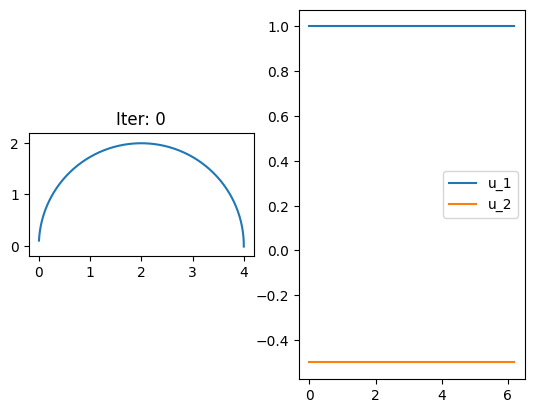

Number of nodes is exceeded after iteration 1. 
Maximum relative residual: 6.46e-01 
Maximum boundary residual: 3.64e-17
[[ -540.62874238   944.09043069]
 [  944.09043069 -6642.83559669]]
0.125


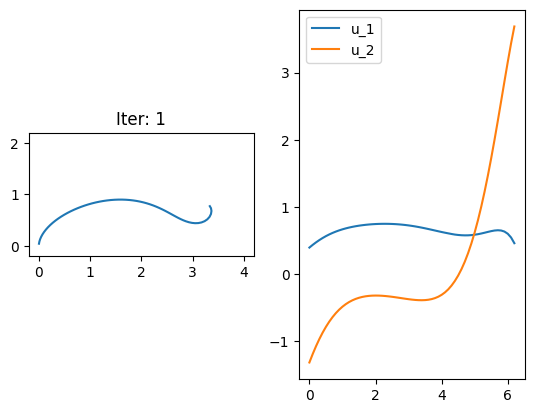

Number of nodes is exceeded after iteration 1. 
Maximum relative residual: 4.72e-01 
Maximum boundary residual: 4.58e-16
[[-1269.21612989 -1274.41470667]
 [-1274.41470667 -3154.87738041]]
0.125


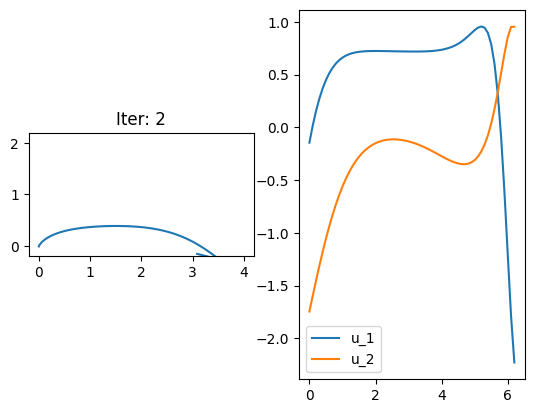

Number of nodes is exceeded after iteration 1. 
Maximum relative residual: 1.63e+00 
Maximum boundary residual: 8.31e-17
[[-1617.95519199  -932.03052522]
 [ -932.03052522 -1324.66860382]]
0.0625


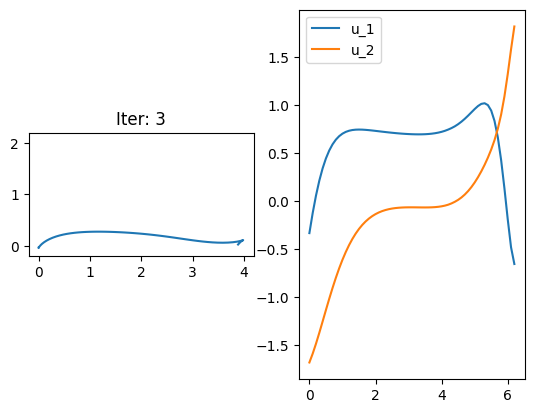

Number of nodes is exceeded after iteration 1. 
Maximum relative residual: 4.71e-01 
Maximum boundary residual: 1.39e-16
[[-57.10702522  49.12851982]
 [ 49.12851982 -98.38804111]]
0.0625


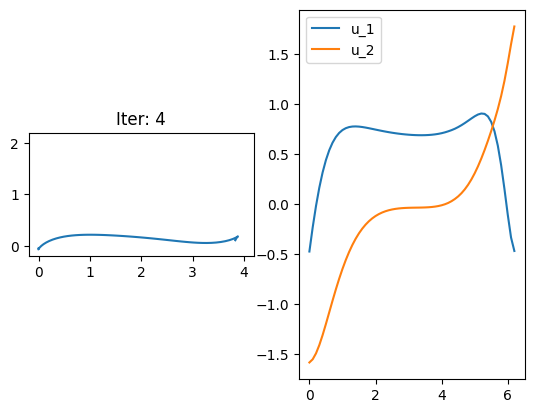

Number of nodes is exceeded after iteration 1. 
Maximum relative residual: 4.09e-01 
Maximum boundary residual: 6.90e-17
[[-23.56999999  16.76240682]
 [ 16.76240682 -30.03848914]]
0.25


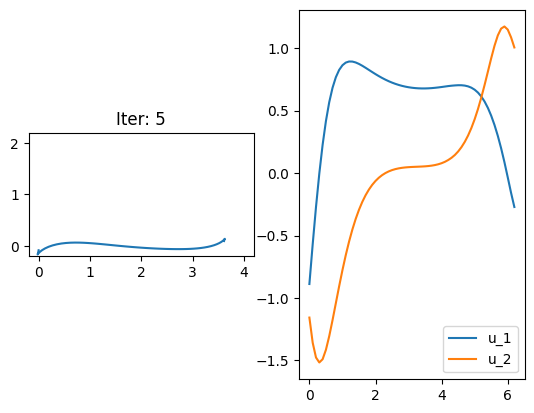

Number of nodes is exceeded after iteration 1. 
Maximum relative residual: 4.59e-01 
Maximum boundary residual: 9.65e-17
[[ -8.44966696   7.79066214]
 [  7.79066214 -17.47094784]]
1.7763568394002505e-15


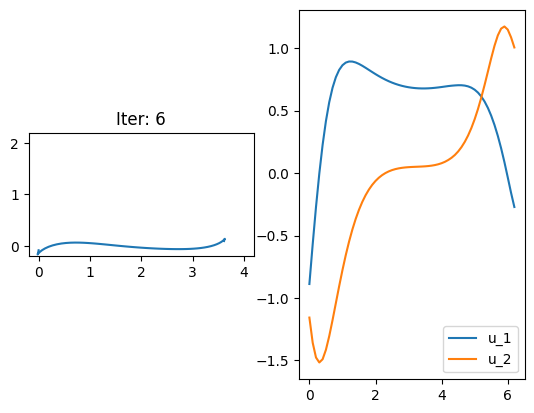

Number of nodes is exceeded after iteration 1. 
Maximum relative residual: 4.59e-01 
Maximum boundary residual: 9.01e-17
[[ -8.44966696   7.79066209]
 [  7.79066209 -17.47094789]]
3.552713678800501e-15


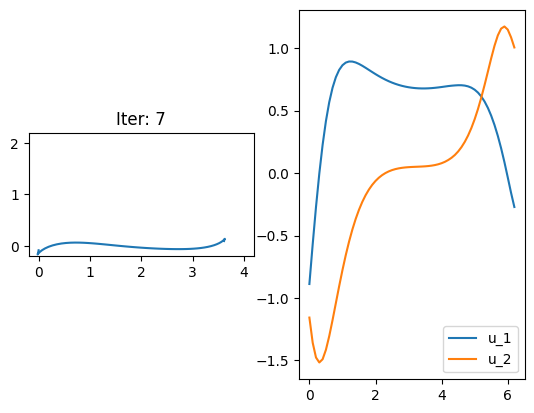

Number of nodes is exceeded after iteration 1. 
Maximum relative residual: 4.59e-01 
Maximum boundary residual: 9.71e-17
[[ -8.44966734   7.79066211]
 [  7.79066211 -17.47094773]]
2.220446049250313e-16


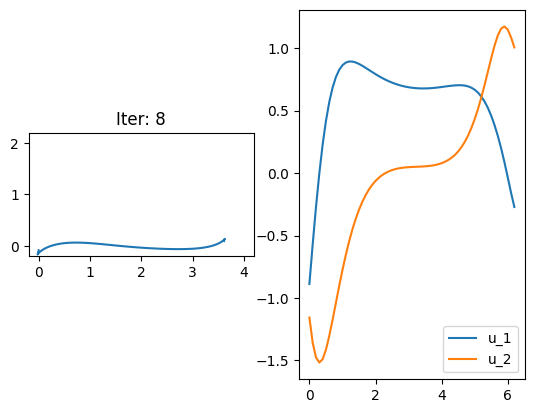

Number of nodes is exceeded after iteration 1. 
Maximum relative residual: 4.59e-01 
Maximum boundary residual: 1.52e-17
[[ -8.44966727   7.79066219]
 [  7.79066219 -17.47094773]]
4.440892098500626e-16


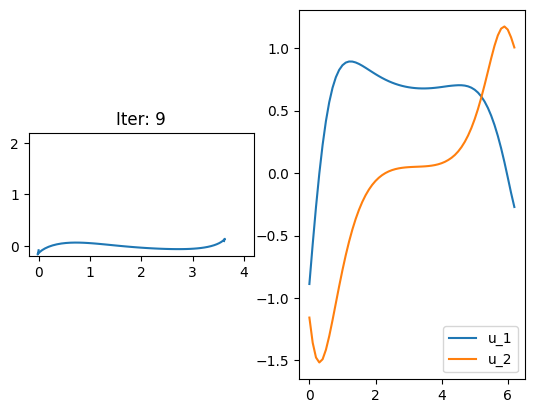

Number of nodes is exceeded after iteration 1. 
Maximum relative residual: 4.59e-01 
Maximum boundary residual: 9.53e-17
[[ -8.44966712   7.79066204]
 [  7.79066204 -17.47094752]]
4.440892098500626e-16


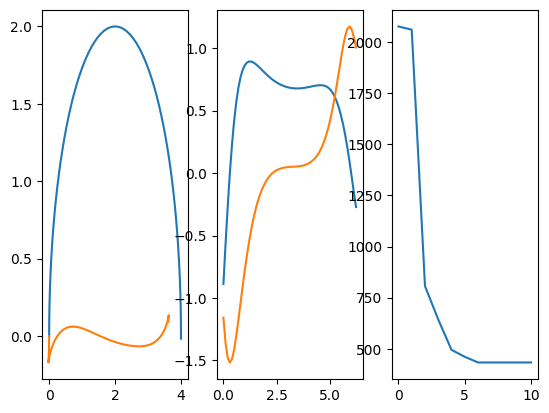

In [14]:
# Start iLQR iterations here

u_traj = init_u_traj.copy()
Jlist = np.zeros(11)
Jlist[0] = func_J(traj_sim(x0, u_traj), u_traj)

for iter in range(10):
    # forward simulate the current trajectory
    x_traj = traj_sim(x0, u_traj)

    # visualize the current trajectory
    fig, axs = plt.subplots(1, 2)
    axs[0].set_title(f"Iter: {iter}")
    axs[0].set_aspect("equal")
    axs[0].set_xlim(-0.2, 4.2)
    axs[0].set_ylim(-0.2, 2.2)
    axs[0].plot(x_traj[:, 0], x_traj[:, 1], linestyle="-", color="C0")
    
    axs[1].plot(tlist, u_traj[:, 0], linestyle="-", label='u_1')
    axs[1].plot(tlist, u_traj[:, 1], linestyle="-", label='u_2')
    axs[1].legend()
    plt.show()
    plt.close()

    # get descent direction
    v_traj = ilqr_iter(x0, u_traj)
    # print(v_traj)
    

    # Armijo line search parameters
    gamma = 1.0  # initial step size
    alpha = 1e-04
    beta = 0.5
    
    print(-v_traj.T @ v_traj)

    ### Implement Armijo line search here to update step size gamma
    while func_J(x_traj, u_traj + gamma * v_traj) > func_J(
        x_traj, u_traj
    ) + alpha * gamma * np.abs(np.trace(-v_traj.T @ v_traj)):
        gamma *= beta
        
    # gamma = 0
        
    print(gamma)

    # update control for the next iteration
    u_traj += gamma * v_traj
    Jlist[iter+1] = func_J(x_traj, u_traj)
    
init_x_traj = traj_sim(x0, init_u_traj)

init_x_traj = np.vstack([x0, init_x_traj])
x_traj = np.vstack([x0, x_traj])
    
fig, axs = plt.subplots(1, 3)

axs[0].plot(init_x_traj[:, 0], init_x_traj[:, 1])
axs[0].plot(x_traj[:, 0], x_traj[:, 1])
axs[1].plot(tlist, u_traj[:, 0])
axs[1].plot(tlist, u_traj[:, 1])
axs[2].plot(Jlist)
plt.show()
plt.close()